# Sentiment Analysis

#This project based on task from my artificial intelligence training @Digital Talent Scholarship 2019

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import Sastrawi
from collections import Counter

In [2]:
df = pd.read_json('data_latih.json',convert_dates=True)

In [3]:
df.head()

,akun,id_user,isi,sentimen,tanggal
0,@AhokDjarot,823082326213021696,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral,Tue Apr 04 14:04:05 +0000 2017
1,@AhokDjarot,3166296157,@AhokDjarot Melayani warga jakarta mulai dari ...,positif,Tue Apr 04 14:00:01 +0000 2017
2,@AhokDjarot,799108167170949121,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif,Tue Apr 04 13:56:37 +0000 2017
3,@AhokDjarot,710566116553166849,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif,Tue Apr 04 13:52:44 +0000 2017
4,@AhokDjarot,1335669534,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif,Tue Apr 04 13:50:01 +0000 2017


In [4]:
df.shape

(650, 5)

In [5]:
df.isnull().sum()

akun        0
id_user     0
isi         0
sentimen    0
tanggal     0
dtype: int64

In [6]:
isi_senti = df[['isi','sentimen']]
isi_senti.head()

,isi,sentimen
0,RT @AhokDjarot: Penasaran sama #BasukiDjarot? ...,netral
1,@AhokDjarot Melayani warga jakarta mulai dari ...,positif
2,@Lintank01 @AhokDjarot Golongan sumbu pendek l...,negatif
3,RT @RahyaMaya: https://t.co/pvVUIp3YYw Pak Aho...,positif
4,Prof. Edward Omar Sharif H. (Ahli Pidana) : Me...,positif


# remove punctuation 

In [7]:
i = 0
list = []
len(isi_senti)

650

In [8]:
while i < len(isi_senti):
    x_new = isi_senti.iloc[i,0]
    x_new = re.sub(r"(?:\@|https?\://)\S+", "", x_new)
    x_new = re.sub(r"RT", "",x_new)
    x_new = re.sub(r"0-9", "", x_new)
    x_new = re.sub('[^ a-zA-Z]', '', x_new)
    x_new = x_new.lower()
    i = i + 1
    list.append(x_new)

In [9]:
list[500]

'  sebuah terobosan dalam pengabdian bagi dki jakarta'

In [10]:
isi_senti_baru = isi_senti.replace(isi_senti['isi'].values, list)
isi_senti_baru.head()

,isi,sentimen
0,penasaran sama basukidjarot punya pertanyaan...,netral
1,melayani warga jakarta mulai dari lahir denga...,positif
2,golongan sumbu pendek lo fpi piaraan kluarga...,negatif
3,pak ahok itu didzolimi aku yakin pak ahok b...,positif
4,prof edward omar sharif h ahli pidana menurut...,positif


In [11]:
isi_senti_baru.shape

(650, 2)

In [12]:
count = isi_senti.groupby('sentimen')[['isi']].count()
count

,isi
sentimen,
negatif,181
netral,178
positif,291


In [13]:
senti_nega = isi_senti_baru[ isi_senti['sentimen'] == 'negatif' ] 
senti_ntrl = isi_senti_baru[ isi_senti['sentimen'] == 'netral' ]
senti_posi = isi_senti_baru[ isi_senti['sentimen'] == 'positif' ]

In [14]:
senti_posi.head(2)

,isi,sentimen
1,melayani warga jakarta mulai dari lahir denga...,positif
3,pak ahok itu didzolimi aku yakin pak ahok b...,positif


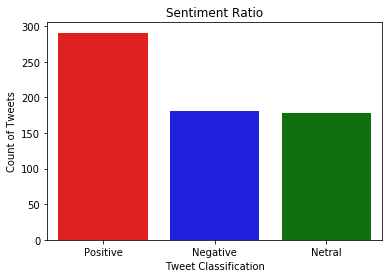

In [15]:
positive = senti_posi['sentimen'].value_counts()['positif']
negative = senti_nega['sentimen'].value_counts()['negatif']
netral = senti_ntrl['sentimen'].value_counts()['netral']

flatui = ["r", "b", 'g']
sns.set_palette(flatui)
sns.barplot(['Positive','Negative', 'Netral'],[positive,negative, netral])
plt.xlabel('Tweet Classification')
plt.ylabel('Count of Tweets')
plt.title('Sentiment Ratio')
plt.show()

# stemming

In [16]:
import csv
key_norm = pd.read_csv('key_norm.csv')
key_norm = key_norm.drop('_id', axis=1)
key_norm.to_csv('files.csv', index=False)
reader = csv.reader(open("files.csv"))
stemmer={}
for row in reader:
    stemmer[row[0]]=row[1]

In [17]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopwords =  stopwords + ['pak']

In [18]:
posi_tweets = []
for tweet in senti_posi.iloc[:,0]:
    wordlist = [word for word in nltk.word_tokenize(tweet) if word not in stopwords] #a list of words per tweet
    posi_tweets.append(wordlist)

In [19]:
ntrl_tweets = []
for tweet in senti_ntrl.iloc[:,0]:
    wordlist = [word for word in nltk.word_tokenize(tweet) if word not in stopwords] #a list of words per tweet
    ntrl_tweets.append(wordlist)

In [20]:
nega_tweets = []
for tweet in senti_nega.iloc[:,0]:
    wordlist = [word for word in nltk.word_tokenize(tweet) if word not in stopwords] #a list of words per tweet
    nega_tweets.append(wordlist)

In [21]:
i = 0
posi_stem = []
while i < len(posi_tweets):
    for word in posi_tweets[i]:    
        if word not in stemmer:
            word = word
            posi_stem.append(word)
        else:
            word = stemmer[word]
            posi_stem.append(word)
    i = i + 1
    
print(posi_stem[0:10])

['melayani', 'warga', 'jakarta', 'mulai', 'lahir', 'berbagai', 'program', 'freeahok', 'ahok', 'didzolimi']


In [22]:
i = 0
ntrl_stem = []
while i < len(ntrl_tweets):
    for word in ntrl_tweets[i]:    
        if word not in stemmer:
            word = word
            ntrl_stem.append(word)
        else:
            word = stemmer[word]
            ntrl_stem.append(word)
    i = i + 1

In [23]:
i = 0
nega_stem = []
while i < len(nega_tweets):
    for word in nega_tweets[i]:    
        if word not in stemmer:
            word = word
            nega_stem.append(word)
        else:
            word = stemmer[word]
            nega_stem.append(word)
    i = i + 1

In [24]:
filtered_nega = [w for w in nega_stem if not w in stopwords]
filtered_posi = [w for w in posi_stem if not w in stopwords]
filtered_ntrl = [w for w in ntrl_stem if not w in stopwords]

In [25]:
len(filtered_nega)

1288

In [26]:
word_counter = Counter(filtered_posi)
most_common_words = word_counter.most_common(10)
most_common_words

[('freeahok', 70),
 ('ahok', 67),
 ('jakarta', 62),
 ('djarot', 51),
 ('warga', 42),
 ('amp', 32),
 ('jakartapunyasemua', 21),
 ('kitabadja', 16),
 ('sama', 14),
 ('ahokdjarot', 14)]

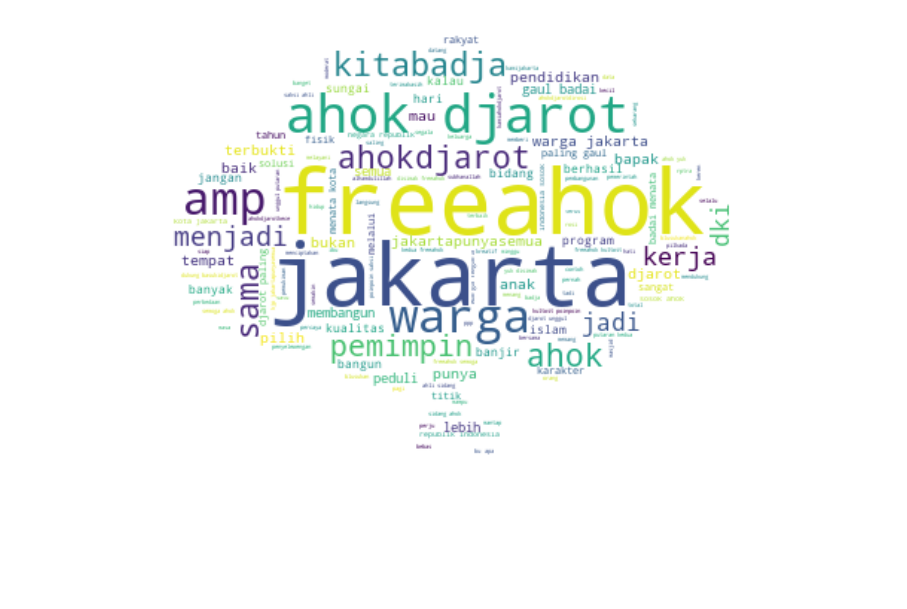

In [27]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
wave_mask = np.array(Image.open("cloud.jpg"))
# Make the figure
#wordcloud = WordCloud(mask=wave_mask).generate(text)
normalized = ' '.join(word for word in filtered_posi) 
wordcloud = WordCloud(mask=wave_mask,max_font_size=60, background_color='white').generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

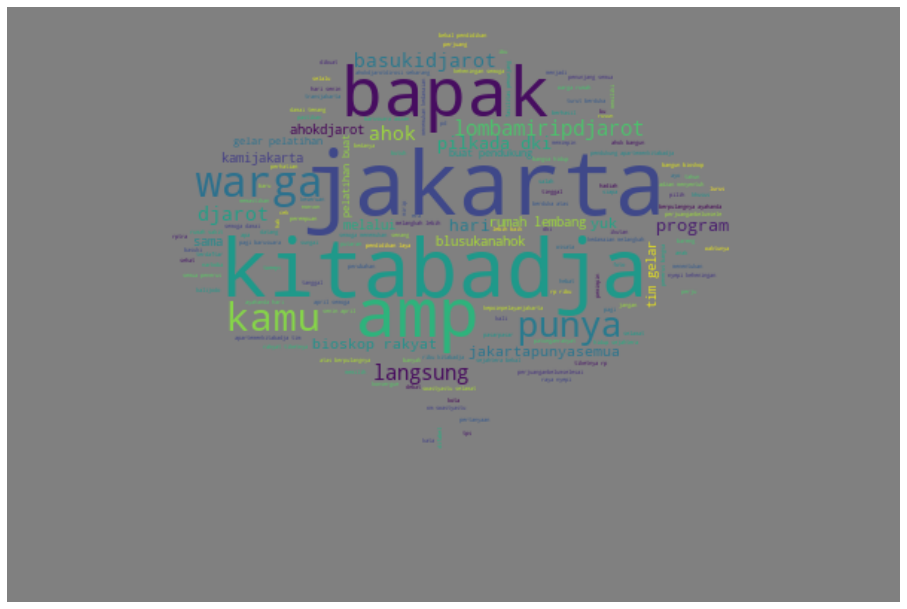

In [28]:
normalized = ' '.join(word for word in filtered_ntrl) 
wordcloud = WordCloud(mask=wave_mask,max_font_size=60, background_color='gray').generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

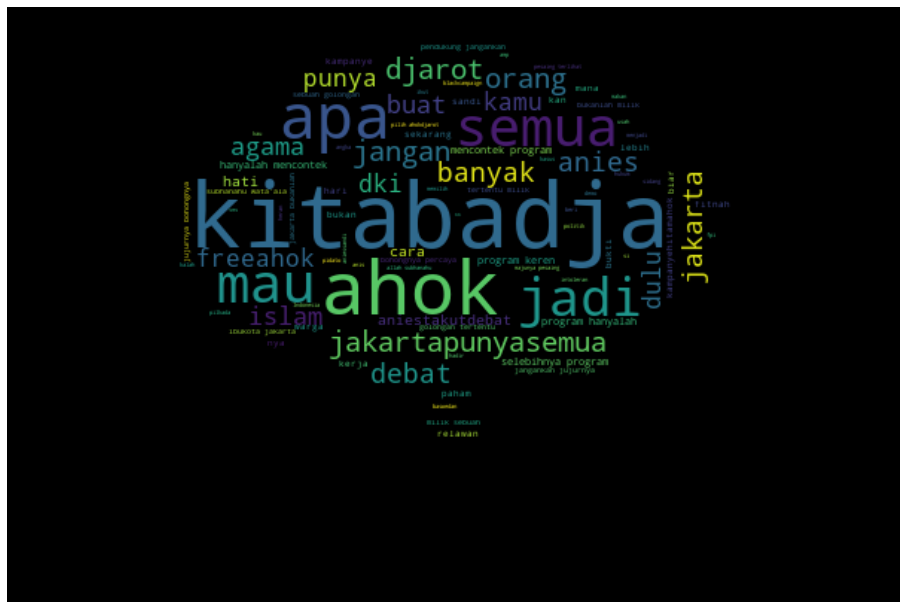

In [29]:
normalized = ' '.join(word for word in filtered_nega) 
wordcloud = WordCloud(mask=wave_mask,max_font_size=60, background_color='black').generate(normalized)
plt.figure(figsize=(16,12))

'''plot wordcloud in matplotlib'''

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Model Development

In [30]:
isi_senti_baru.head(10)

,isi,sentimen
0,penasaran sama basukidjarot punya pertanyaan...,netral
1,melayani warga jakarta mulai dari lahir denga...,positif
2,golongan sumbu pendek lo fpi piaraan kluarga...,negatif
3,pak ahok itu didzolimi aku yakin pak ahok b...,positif
4,prof edward omar sharif h ahli pidana menurut...,positif
5,pak ahok itu didzolimi aku yakin pak ahok b...,positif
6,pak ahok djarot paling kece badai yang bisa ...,positif
7,penasaran sama basukidjarot punya pertanyaan...,netral
8,surah al maidah bukan diartikan untuk mengha...,positif
9,lah ahok di penjarabersih penjara aja biar d...,negatif


In [31]:
isi_senti_baru['kategori'] = isi_senti_baru['sentimen'].apply(
      lambda x: 2 if x == 'positif' else (0 if x == 'negatif' else 1))
isi_senti_baru.head(10)

,isi,sentimen,kategori
0,penasaran sama basukidjarot punya pertanyaan...,netral,1
1,melayani warga jakarta mulai dari lahir denga...,positif,2
2,golongan sumbu pendek lo fpi piaraan kluarga...,negatif,0
3,pak ahok itu didzolimi aku yakin pak ahok b...,positif,2
4,prof edward omar sharif h ahli pidana menurut...,positif,2
5,pak ahok itu didzolimi aku yakin pak ahok b...,positif,2
6,pak ahok djarot paling kece badai yang bisa ...,positif,2
7,penasaran sama basukidjarot punya pertanyaan...,netral,1
8,surah al maidah bukan diartikan untuk mengha...,positif,2
9,lah ahok di penjarabersih penjara aja biar d...,negatif,0


In [43]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [44]:
def tokenization_tweets(dataset, features):
    tokenization = TfidfVectorizer(max_features=features)
    tokenization.fit(dataset)
    dataset_transformed = tokenization.transform(dataset).toarray()
    return dataset_transformed

In [45]:
All_array = tokenization_tweets(isi_senti_baru['isi'], 2040)

In [119]:
pca = PCA(n_components = 20)
lda = LinearDiscriminantAnalysis(n_components = 2)
All_array_pca = pca.fit(All_array).transform(All_array)
All_array_lda = lda.fit(All_array, isi_senti_baru['kategori']).transform(All_array)

C:\Users\AR\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [120]:
(X_train, X_test, y_train, y_test) = train_test_split(All_array_pca, isi_senti_baru['kategori'], test_size=.2)

In [121]:
X_train.shape

(520, 20)

### Evaluation for each model

In [122]:
from sklearn.metrics import classification_report
urut = isi_senti_baru.sort_values(by = 'kategori', ascending=True)
label = urut['sentimen'].unique()

### Naive Bayes model

In [123]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
pGNB = gnb.predict(X_test)
print(classification_report(y_test, pGNB, target_names = label))

              precision    recall  f1-score   support

     negatif       0.41      0.86      0.56        37
      netral       0.62      0.29      0.39        35
     positif       0.72      0.45      0.55        58

    accuracy                           0.52       130
   macro avg       0.59      0.53      0.50       130
weighted avg       0.61      0.52      0.51       130



### SVM Model

In [124]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma='auto')
svc.fit(X_train,y_train)
pSVC = svc.predict(X_test)
print(classification_report(y_test, pSVC, target_names = label))

              precision    recall  f1-score   support

     negatif       0.00      0.00      0.00        37
      netral       0.00      0.00      0.00        35
     positif       0.45      1.00      0.62        58

    accuracy                           0.45       130
   macro avg       0.15      0.33      0.21       130
weighted avg       0.20      0.45      0.28       130



C:\Users\AR\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Random Forest Model

In [125]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)
pRFC = rfc.predict(X_test)
print(classification_report(y_test, pRFC, target_names = label))

              precision    recall  f1-score   support

     negatif       0.69      0.65      0.67        37
      netral       0.66      0.60      0.63        35
     positif       0.68      0.74      0.71        58

    accuracy                           0.68       130
   macro avg       0.67      0.66      0.67       130
weighted avg       0.68      0.68      0.68       130

